In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from agots.multivariate_generators.multivariate_data_generator import MultivariateDataGenerator

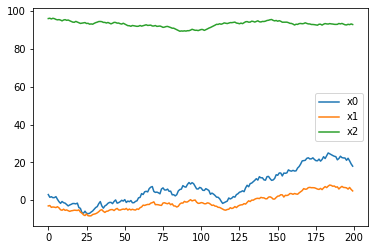

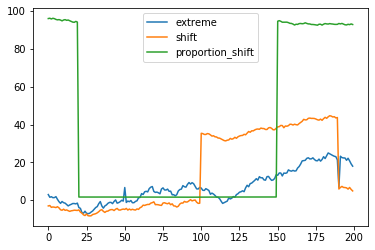

,x0,x1,x2
0,3.000000,-3.000000,96.000000
1,1.572558,-2.796408,96.162810
2,1.873181,-3.736824,95.789481
3,1.361140,-3.546805,96.138731
4,1.408475,-3.665022,95.949550
...,...,...,...
195,21.123842,6.553748,92.635528
196,22.186630,5.888479,92.968444
197,20.816212,6.757978,92.786384
198,19.224018,5.723776,93.153456


In [4]:
np.random.seed(1337)

STREAM_LENGTH = 200
N = 3
K = 2

dg = MultivariateDataGenerator(STREAM_LENGTH, N, K)
df = dg.generate_baseline(initial_value_min=-4, initial_value_max=4)

df['x2'] += 100
for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()

df.corr()

df = dg.add_outliers({'extreme': [{'n': 0, 'timestamps': [(50,), (190,)], 'factor_range': (8.0, 10.0)}],
                      'shift':   [{'n': 1, 'timestamps': [(100,190)], 'factor_range': (8.0, 10.0)}],
                      'proportion_shift':   [{'n': 2, 'timestamps': [(20, 150)],
                                              'factor_range': (-.995, -0.98)}],
                     })

for col, label in zip(df.columns, ['extreme', 'shift', 'proportion_shift']):
    plt.plot(df[col], label=label)
plt.legend()
plt.savefig('synthetic_anomaly_examples.png', dpi=400)
plt.show()
df